In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.7.1'

In [3]:
%matplotlib inline

In [4]:
# DEFINING THE PATH

Path  = r'/Users/ghalebju/Desktop/Data Analysis Format/Part 6'

In [5]:
#importing data set

df = pd.read_csv(os.path.join(Path, 'zomato-last-version','01 Data','prepared data' , 'Zomato_clean.csv'), index_col = False)

2. Exploring relationships

In [6]:
#exploring columns names
df.columns 

Index(['Unnamed: 0', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
#explorong values in "Unnamed: 0" column
df.head()

,Unnamed: 0,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [8]:
#dropping column "Unnamd: 0"
df = df.drop(columns = ['Unnamed: 0'])

In [9]:
# Create a correlation matrix using pandas

df.corr()

/var/folders/s5/185t061116b37123q55fx3hc0000gn/T/ipykernel_43769/1125721538.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,rate,votes,approx_cost(for two people)
rate,1.000000,0.382120,0.315253
votes,0.382120,1.000000,0.310748
approx_cost(for two people),0.315253,0.310748,1.000000


we have only three quantitative variables

the correlation coefficient between number of votes and the approximate cost is 0.3 which means that these two variables
have a positive medium correlation.

The correlation between rate and the approximate cost is also around 0.3 so the relationship is a medium positive one as well.

/var/folders/s5/185t061116b37123q55fx3hc0000gn/T/ipykernel_43769/2845793157.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr())


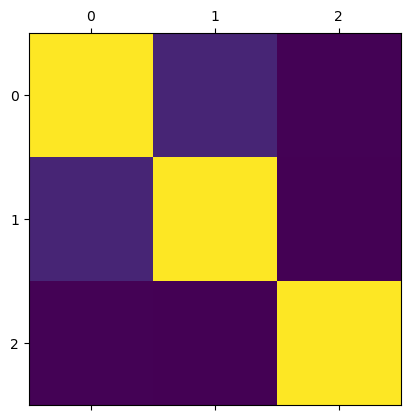

In [10]:
# Create a correlation heatmap using matplotlib

plt.matshow(df.corr())
plt.show()

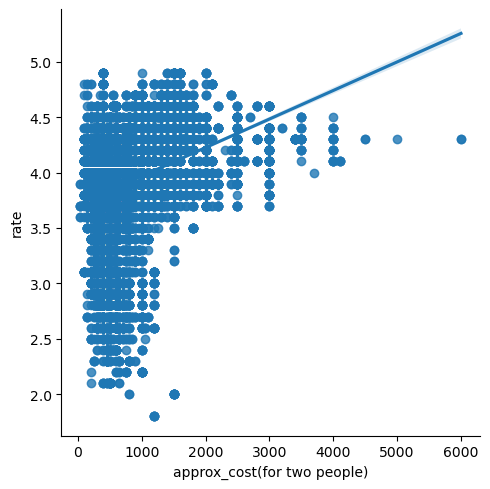

In [11]:
# Create a scatterplot for the "rate" and "approx_cost(for two people)" 

sns.lmplot(x = 'approx_cost(for two people)', y = 'rate', data = df)


Since we are interested in sudying the dependency of the rating variable on the cost of meal variable, we started by checking the correclation between the two variable. for that, we created a scatterplot with the "approx-cost(for two people)" variable on the x-axis as our independent variable


As we see, the correlation is not that strong between the two variables "since most point are far away from the line", but there is a positive correlation. meaning that the higher the approximate cost of dinner for two people, the better the rating a restaurant will have.

<Axes: xlabel='rate', ylabel='Count'>

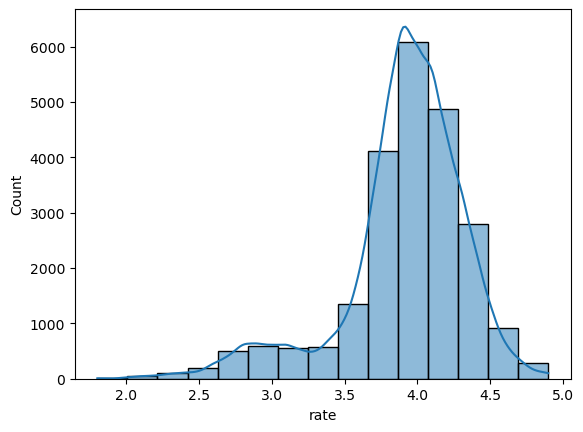

In [12]:
sns.histplot(df['rate'], bins = 15, kde = True)

In [13]:
df.loc[df['rate'] < 3, 'Rate category'] = 'Low rate'

In [14]:
df.loc[(df['rate'] >= 3) & (df['rate'] < 4.5), 'Rate category'] = 'Middle rate'

In [15]:
df.loc[df['rate'] >= 4.5, 'Rate category'] = 'High rate'

In [16]:
df['Rate category'].value_counts(dropna = False)

Middle rate    20650
High rate       1212
Low rate        1174
Name: Rate category, dtype: int64

In [17]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Rate category'],
      dtype='object')

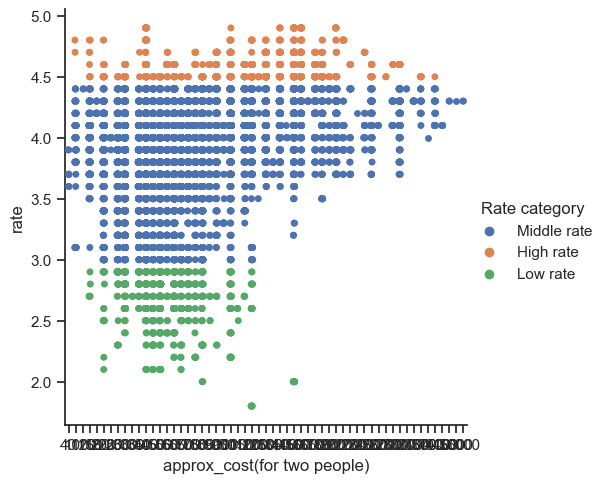

In [18]:
sns.set(style="ticks")
g = sns.catplot(x="approx_cost(for two people)", y="rate", hue="Rate category", data=df)

1) Our first obvservtion is that "Low rate" category covers only restaurants from law to midium cost. meaning that there are no restaurants with very high cost and a very law rate. 

2) On the other hand, the "Middle rate" and "High rate" categories are more or less fairly distributed among all type of costs. it is intersting though that there are much more expensive restaurants with middle rate than midium cost restaurants with high rates.